# Lekce 5

Základní otázkou je, proč se statistikou vůbec zabýváme a co statistika nabízí navíc oproti datové analýze. Hlavní rozdíl mezi statistikou a datovou analýzou je, že u statistiky se zpravidla zabýváme vzorkem dat a na základě vzorku dat usuzujeme, jaké má vlastnosti nějaký větší celek. Srovnejme si například volby a předvolební průzkum. Ve volbách se ptáme všech lidí, jaké jsou jejich volební preference. V předvolebním průzkumu se ptáme nějakého malého vzorku lidí (obvykle kolem tisíce lidí) a z toho, co nám odpoví, usuzujeme, jaké politické preference má celá populace. Předvolební průzkum tedy vyžaduje nějaké statistické znalosti, které nám řeknou, jak sestavit vzorek respondentů, jak přesný je náš odhad atd.

## Základní statistické ukazatele

Máme-li k dispozici nějaký soubor dat, často nás zajímají různé statistické ukazatele. Nejčastěji nás zajímají ukazatele **úrovně (polohy)** a ukazatele **variability**. Ty s přehledem zvládne například modul `statistics`, který je součástí základních modulů Pythonu. My pro zpracování dat využijeme modul `pandas`.

Budeme využívat data o cenách domů, která jsou v souboru `house_prices.csv`. V souboru je důležitý sloupec `SalePrice`, tj. cena domu, a poté různé parametry domu, jako obytná plocha, typ čtvrti, ve které se dům nachází atd. Data načteme ze souboru `house_prices.csv` pomocí metody `read_csv()`. Data jsou uložena do struktury, kterou nazýváme `DataFrame` (tabulka) a je v podstatě obdoba SQL tabulky. U každé tabulky máme různě pojmenované sloupečky a můžeme vždy vybrat jeden sloupeček a pracovat jen s ním.

In [11]:
import pandas
data = pandas.read_csv("house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946+,RL,65.0,8450,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946+,RL,80.0,9600,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946+,RL,68.0,11250,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Sept,2008,WD,Normal,223500
3,4,2-STORY 1945-,RL,60.0,9550,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946+,RL,84.0,14260,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Dec,2008,WD,Normal,250000


### Průměr a medián

Nejznámější ukazatele polohy jsou **aritmetický průměr** a **medián**. Aritmetický průměr je součet hodnot vydělený jejich počtem, medián získáme jako prostřední hodnotu u dat seřazených podle velikosti. Platí, že medián je méně citlivý na tzv. **odlehlá pozorování (outliers)**, v našem případě by to byly extrémně drahé nebo naopak levné domy.

Průměr zjistíme pomocí metody `mean()` a medián pomocí metody `median()`, metody použijeme pro sloupeček `SalePrice`, tj. pro prodejní cenu domu.

In [12]:
print(data["SalePrice"].mean())
print(data["SalePrice"].median())

180151.2335164835
163000.0


### Rozptyl

Ukazatele variability říkají, jak **různorodé** jsou hodnoty v rámci jedné skupiny. Funkci rozptylu si nejlépe ukážeme, když ho spočítáme pro dva různé soubory dat. Uvažujme, že rozdělíme domy do dvou skupin, a to podle typu obytné zóny, ve které se nacházejí. Máme nyní dvě nové tabulky - `data_RM` s domy v zónách se středně hustou zástavbou a `data_RH` s domy v zónách s velmi hustou zástavbou.

In [13]:
# Načteme data
data_RM = data[data["MSZoning"] == "RM"]
data_RH = data[data["MSZoning"] == "RH"]
# Zjistíme průměry
print(data_RM["SalePrice"].mean())
print(data_RH["SalePrice"].mean())
# Zjistíme rozptyly
print(data_RH["SalePrice"].var())
print(data_RM["SalePrice"].var())

126316.83027522935
131558.375
1275498255.5833333
2354354384.206084


Průměr zjistíme pomocí metody `var()`. Jde o zkratku anglického výrazu *variance*.

Z výsledků vidíme, že průměrná cena domů v obou typech zón je skoro stejná, domy se středně hustou zástavbou však mají výrazně větší rozptyl. To znamená, že ceny domů v zónách se středně hustou zástavbou jsou mnohem více různorodé.

Abychom si popsali význam rozptylu (a variability obecně), ukážeme si ho na několika dalších příkladech.

- Uvažujme například známky z testu pro dvě třídy. Obě třídy mají průměr velmi blízký trojce. První třída má velmi malý rozptyl a druhá obrovský. Co to znamená? V první třídě měli skoro všichni trojku, ve druhé třídě měla velká skupina žáků jedničku a jiná velká skupina pětku.
- Vysoký rozptyl u cen akcií většinou znamená, že je akcie riziková. Její cena se totiž v čase hodně mění a může se stát, že prudce klesne ve chvíli, kdy ji budeme potřebovat prodat.
- Vysoký rozptyl výkonů u sportovního oddílu znamená, že jsou jejich výkony nevyrovnané. Pokud by nejlepší sportovec nemohl nastoupit do závodu, výrazně to ovlivní výsledek celého týmu.
- Uvažujme dotazník spokojenosti ve firmě. Pokud má vysoký rozptyl výsledků, jsou někteří zaměstnanci nadšení, ale jiní jsou velmi frustrovaní. Nelze tedy být v klidu, protože průzkum dopadl "jakž takž", frustrovaní zaměstnanci totiž dříve či později odejdou. Není třeba rozdíl v kvalitě jednotlivých team leaderů?

![](images/grafik-11.png)


### Kvantil

Medián odpovídá na otázku, jaká hodnota leží v seřazeném souboru přesně uprostřed, tj. pro jaké číslo platí, že 50 % souboru má menší hodnotu a 50 % větší. Podobnou otázku ale můžeme položit i pro jiné procento, např. se můžeme zeptat, jaká je hraniční hodnota pro 1 %, 10 % nebo 90 % hodnot. Taková čísla označujeme jako **kvantily**. Například desetiprocentní kvantil říká, pro jaké číslo platí že 10 % hodnot souboru je menší a zbylých 90 % větší.

In [14]:
print(data["SalePrice"].quantile(0.1))

106375.0


Jaké otázky můžeme zodpovědět:
- V jakém rozmezí se pohybuje příjem 10 % nejchudších nebo 10 % nejbohatších lidí?
- Jak rychle musím uběhnout maraton, abych patřil mezi 10 % nejlepších závodníků?
- Pokud přijímáme na školu 60 % nejlepších studentů v příjmacím řízení, od jakého počtu bodů budeme přijímat.

### Inverzní kvantilová funkce

Zajímavá může být i **opačná otázka** - kolik procent hodnot je menších než nějaká vybraná hodnota? Protože řešíme opačný problém než u kvantilové funkce, někdy se pro tuto funkci používá pojem inverzní kvantilová funkce, častější označení je pak (empirická) **distribuční funkce**.

Pokud bychom například chtěli prodávat dům, mohlo by být zajímavé vědět, kolik procent domů na trhu je levnější než ten náš. K vyřešení této otázky použijeme funkci `percentileofscore` z modulu `scipy`. Funkce má jako první parametr data, se kterými chceme pracovat, a jako druhý parametr hodnotu, pro kterou chceme výpočet provést.

Níže například zjistíme, kolik procent domů je levnějších než 200000.

In [15]:
from scipy import stats
stats.percentileofscore(data["SalePrice"], 200000)

70.57005494505495

Jaké otázky můžeme zodpovědět:
- Kolik procent lidí má menší (a větší) plat než já?
- Pokud chci vyrábět trička, kolik procent jednotlivých velikostí bych měl vyrábět?
- Pokud uběhnu naraton za 4 hodiny a 15 minut, kolik závodníků bude rychlejší nebo naopak pomalejší?

### Histogram

Další možností, jak se podívat na rozložení dat, je histogram. Histogram je graf, který pro různé intervaly hodnot zobrazuje, kolik dat se v daném intervalu nachází.

![](images/histogram.png)

Histogram vytvoříme pomocí metody `hist()`.

<Axes: >

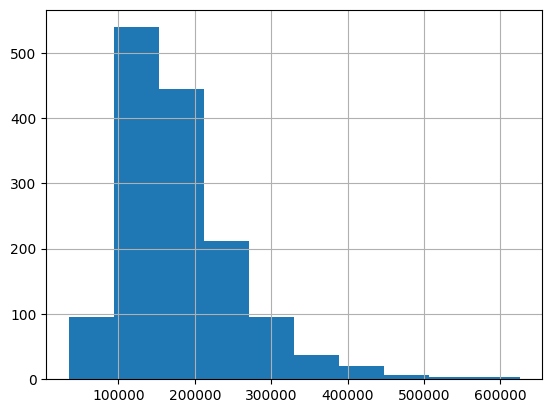

In [16]:
data["SalePrice"].hist()

U histogramu si můžeme zvolit, na kolik parametrů chceme data rozdělit. Pokud dáváme přednost jemnějšímu dělení, můžeme pomocí parametru `bins` nastavit vyšší počet intervalů, například 25.

<Axes: >

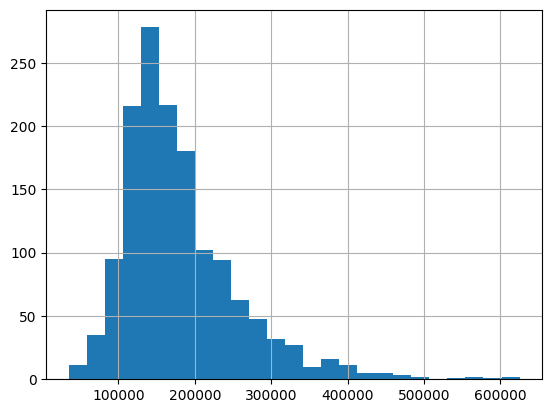

In [17]:
data["SalePrice"].hist(bins=25)

![](images/histogram_2.png)

V histogramech vidíme další důležitou věc - data jsou rozdělena nesymetricky. Z histogramu vidíme, že v datech jsou i nějaká odlehlá pozorování, což je třeba dům s cenou nad 600 tis.

## Distribuční funkce a rozdělení

Uvažujme nyní, že bychom namísto sloupců použili čárový graf. Na osu *y* grafu pak nedáme absolutní počet hodnot v daném intervalu, ale relativní počet hodnot. Takový graf označujeme jako graf **funkce hustoty**. Pokud bychom nyní chtěli vědět, jaká část dat se nachází v nějakém intervalu, zjistili bychom to podle **plochy** pod křivkou.

K vytvoření grafu použijeme metodu `.plot.kde()`. Zkrakta KDE označuje *kernel density estimation*, tj. jádrový odhad hustoty. Musíme totiž myslet na to, že nemáme kompletní data, ale pouze jejich část, proto je naše funkce pouze odhadem funkce hustoty kompletních dat.

<Axes: ylabel='Density'>

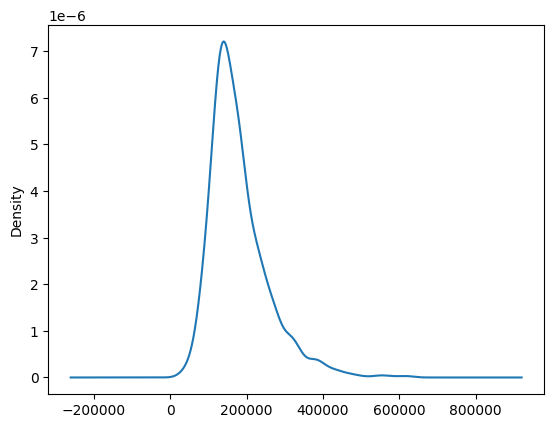

In [18]:
data["SalePrice"].plot.kde()

Pokud máme funkci hustoty, je to nejlepší možný popis jakýchkoli dat. Postupem času bylo zjištěno, že hustoty mnohých dat mají podobný tvar. Například níže máme čtyři funkce, které jsou sice různé (mají různě vysoké maximum a jsou různé "roztažené"), ale tvar mají podobný. Všechny čtyři hustoty mají stejné tzv. **statistické rozdělení**. To znamená, že všechny čtyři hustoty lze popsat stejnou matematickou funkcí, která se liší pouze proměnnými (konkrétně průměrem a rozptylem). Statistické rozdělení těchto hustot označujeme jako **normální (Gaussovo) rozdělení**.

![](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

Normální rozdělení má spousta "jevů", které se vyskytují v přírodě, například délka, výška nebo hmotnost živé tkáně, krevní tlak lidí atd. Používá se také ve financích na oceňování opcí (např. v Black–Scholesově modelu). Normální rozdělení mají často i chyby měření při experimentech.

Vedle normálního rozdělení existuje spousta dalších. Jedním z nich je například exponenciální rozdělení. Exponenciální rozdělení často má délka intervalu mezi dvěma náhodnými událostmi, například příchozími telefonáty v call centru, nebo čas rozpadu radioaktivní částice.

![](https://upload.wikimedia.org/wikipedia/commons/0/02/Exponential_probability_density.svg)

Rovnoměrné rozdělení má pro každé dva stejně široké intervaly stejnou pravděpodobnost, jeho hustota je konstantní funkce. Pro rovnoměrné rozdělení uvažujeme krajní hodnoty *a* a *b*, mimo tyto krajní hodnoty je pravděpodobnost 0.

![](https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg)

Rovnoměrné rozdělení existuje ve verzi pro celá i desetinná čísla, pro celá čísla bychom neměli graf hustoty čárový graf, ale graf by se skládal z "teček". Rovnoměrné rozdělení mají (resp. by měly mít) jevy, které souvisí s hazardními hrami. U hracích kostek či rulety by měla být pravděpodobnost padnutí každého z čísel stejná.

![](images/Uniform_discrete_pmf_svg.svg)

## Korelace

Uvažujme, že chceme sestavit model, který na základě parametrů nemovitosti odhadne jeho cenu. Cíle takové analýzy pak může být například:

- vytvoření modelu na oceňování nemovitostí pro prodejce, aby prodejce nebo realtiní kancelář neprodávali nemovitosti příliš levně, a současně aby jim v katalozích "nestrašily" zbytečně předražené nemovitosti,
- kontrola ocenění nemovitosti pro kupující, případně identifikace podhodnocených či předražených nemovitostí.

Prvním krokem takové analýzy může být vyřešení otázky: Jaké faktory ovlivňují cenu domu? První hodnota, která nás napadne, je pravděpodobně obytná plocha domu. Předpokládáme, že větší dům bude spíše dražší než menší. Neplatí ale matematické pravidlo, že by dvakrát větší plocha domu automaticky znamenala prodej za dvojnásobek ceny, protože cenu domu ovlivňuje řada dalších faktorů (plocha pozemku, vybavení jako garáž, bazén, technický stav atd.). Plocha tedy může mít na cenu určitý vliv, rozhodně ale není jediným determinantem ceny. Takovému typu závislosti se říká **stochastická závislost**.

Závislost si můžeme ukázat na obrázku, tj. bodovém grafu. K vytvoření obrázku využijeme modul `seaborn`, který slouží ke snadnému vytváření statistických grafů. Nejprve použijeme `JointGrid`, kterým vytvoříme novou tabulku, kde budou vybrané sloupce: již známý `SalePrice` a sloupeček s obytnou plochou domu (bez obytné plochy v podzemní části) `GrLivArea`. Tabulku uložíme do proměnné `g` a následně použijeme metodu `plot_join()` na vytvoření bodového grafu (`scatterplot`).

![](images/bodovy_graf.png)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

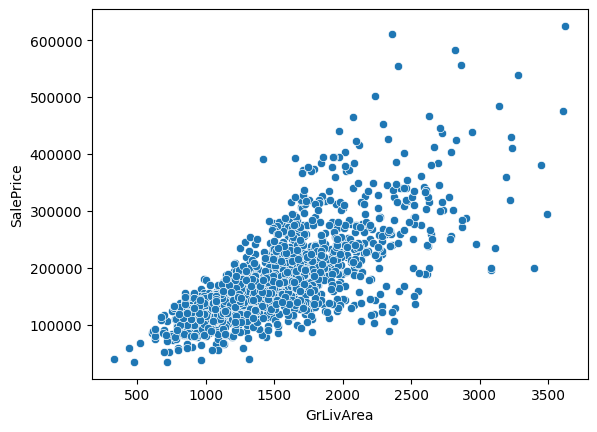

In [19]:
import pandas
import seaborn
import matplotlib.pyplot as plt
seaborn.scatterplot(data=data, x="GrLivArea", y="SalePrice")

Na grafu vidíme, že cena domu má skutečně tendenci růst s velikostí obytné plochy. Sloupců v našem datovém souboru je ale hodně a není úplně praktické pro každý z nich vytvářet graf a vizuálně řešit velikost závislosti. Můžeme ale využít hodnotu, kterou označujeme **korelace**. Korelace nám dává sílu *lineární stochatické závislosti* mezi dvěma veličinami. Slovo *lineární" znamená, že graficky bychom závislost viděli jako přímku. Korelace může nabývat hodnoty od -1 do +1.

- Hodnoty blízko +1 znamenají silnou přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.
- Hodnoty blízko 0 znamenají lineární nezávislost.
- Hodnoty blízko -1 znamenají silnou nepřímou lineární závislost, tj. jedna hodnota roste a současně druhá klesá.

Příklady přímé závislosti: čas strávený studiem a výsledek v testu, délka tréninku a výsledek v závodě, délka praxe a výše mzdy atd. Příklady nepřímé závislosti: množství vypitého alkoholu a kognitivní schopnosti, zimní teploty a spotřeba energie na vytápění.

Hodnotu korelace zjistíme pomocí metody `corr()` pro zvolenou tabulku. Tato metoda vytvoří tzv. korelační matici, tj. matici, která obsahuje korelace pro všechny dvojice dat v tabulce. Abychom se v obří tabulce neztratili, vybereme si pouze sloupečky `GrLivArea` a `SalePrice`. Protože tentokrát nevybíráme pouze jeden sloupeček, ale seznam sloupců, musíme použít další dvojici hranatých závorek.

In [20]:
data_vybrane_sloupce = data[["GrLivArea", "SalePrice"]]
data_vybrane_sloupce.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.720516
SalePrice,0.720516,1.000000


Korelace automaticky neznamená, že obě veličiny se vzájemně ovlivňují.

Uvažujme například počet turistů a počet komárů v kempu u přehrady. Obě veličiny jsou sice korelované, ale v důsledku počasí jako třetího vlivu. Pokud bychom například kemp zavřeli a počet turistů by klesl na nulu, počet komárů to nijak neovlivní.

Podobně můžeme "odhalit" korelaci, která je vy skutečnosti náhodná. Doslova legendárním příkladem se stala korelace mezi počtem lidí, kteří se utopili v důsledku pádu do bazénu, a počtem filmů, ve kterých hrál Nicolas Cage. Z logiky věci je jasné, že tyto veličiny se vzájemně nijak neovlivňují, přesto bychom mezi nimi našli vysokou korelaci.

![](images/1_ERarZ75RoWF8Vn-_AlEmaA.jpeg)

# Cvičení

## Plocha garáže

Uvažujme nyní plochu garáže (`GarageArea`). Ovlivňuje plocha garáže cenu domu? Ověř to pomocí korelace mezi oběma hodnotami. Dále se podívej na bodový graf obou hodnot. Je z grafu vidět rozdílná síla závislosti oproti obytné ploše domu? Dále zkus prověřit plochu pozemku včetně nezastavěných částí (`LotArea`).

## Plocha pozemku

Uvažujme nyní plochu pozemku, na kterém dům stojí (`LotArea`). Ovlivňuje plocha pozemku cenu domu? Opět se podívej na hodnotu korelace mezi cenou domu a plochou pozemku a zobraz si vztah mezi hodnotami pomocí grafu. Dále se podívej na korelaci mezi plochou pozemku a obytnou plochou domu. Je zde nějaká korelace, tj. platí, že čím větší je obytná plocha domu, tím větší má tendenci být pozemek?

## Popisná statistika jednou metodou

Pandas umožňuje zobrazit všechny důležité statistické ukazatele jednou metodou, a to metodou `.describe()`, kterou můžeš použít pro jeden sloupec, více vybraných sloupců či celou tabulku. Zkus použít metodou pro sloupec `GrLivArea`a odpověz na následující otázky.

- Jaká je průměrná obytná plocha domu?
- Má většina domů větší či menší obytnou plochu než 1500 čtverečních stop?
- Dokážeš z těchto dat určit kvadratické rozpětí - rozdíl mezi 75%ním a 25%ním kvantilem. Jedná se o ukazatel polohy nebo ukazatel variability?
- V datech není rozptyl, ale je tam záhadná hodnota, která je označená jako `std`. Pokud zadáš zkratku do Google, zjistíš, že STD může znamenat sexuálně přenosné choroby, což není tento případ. Zkus třeba zadat do Google `std` v kombinaci s výrazem `pandas`. Tím se dostaneš na [tuto stránku v dokumentaci](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html). Tím bys zjistila, že jde o "standard deviation". Zkus nyní pomocí Google najít, co to vlastně je. Můžeš například otevřít Wikipedii, kde je stránka o tomto pojmu i v češtině.
